In [11]:
#First, we import the necessary modules and classes for the code.  

from math import pi # Import the constant pi from the math module
from fractions import Fraction
import math # Import the math module
import numpy as np #Import the numpy module and alias it as np

# Import quantum libraries ( Qiskit, Pyquil, Cirq, Pennylane, and Braket) and classes

from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator
from quantumgateway.main import translate_to_framework, simulate_circuit
#-----------------------------------------------------------------------------
#Assigning Constants:
#-----------------------------------------------------------------------------

pi = math.pi # π is assigned to the variable 'pi'
n_count = 2  # n_count is set to 2, it represents the number of counting qubits in the quantum circuit

#-----------------------------------------------------------------------------
#Quantum Circuit Initialization:
#-----------------------------------------------------------------------------

circ = QuantumCircuit(5, 5)  # A quantum circuit (QuantumCircuit) is initialized with 5 qubits and 5 classical bits

#-----------------------------------------------------------------------------
#Applying initial Quantum Gates:
#-----------------------------------------------------------------------------

# A loop applies Hadamard gates (H) to the first two qubits
for i in range(2): 
    circ.add_gate(QuantumGate("H", [i]))

# An X gate is applied to the 3rd qubit
circ.add_gate(QuantumGate("X", [2]))  
# CNOT gates are applied to different pairs of qubits
circ.add_gate(QuantumGate("CNOT", [0, 4]))  
circ.add_gate(QuantumGate("CNOT", [1, 3]))  
circ.add_gate(QuantumGate("CNOT", [1, 2]))  
circ.add_gate(QuantumGate("CNOT", [1, 4]))  
circ.add_gate(QuantumGate("CNOT", [1, 3]))  
# Toffoli gates are applied to control qubits 0 and 1, targeting qubits 3 and 4
for i in range(3, 5): 
    circ.add_gate(QuantumGate("Toffoli", [0, 1, i]))

#-----------------------------------------------------------------------------
#Measure the auxiliary qubits:
#-----------------------------------------------------------------------------

# MEASURE gates are applied to the control qubits (qubits 3 and 4)
for i in range(3, 5):  
    circ.add_gate(QuantumGate("MEASURE", [i, i]))
    
#-----------------------------------------------------------------------------
#Quantum Fourier Transform (QFT):
#-----------------------------------------------------------------------------

#The QFT is applied to the first 2 qubits. Hadamard gates and controlled-phase gates (CPHASE) are applied in a nested loop.
n = 2 
for i in range(n - 1, -1, -1):
    circ.add_gate(QuantumGate("H", [i])) # The Hadamard gates (H) are applied to the first two qubits in a loop (for i in range(n - 1, -1, -1))
    for j in range(i - 1, -1, -1):
        circ.add_gate(QuantumGate("CPHASE", [j, i], [pi / (2 ** (i - j))])) #Controlled-phase gates (CPHASE) are then applied to 
        #implement the Quantum Fourier Transform

# SWAP gates are applied to perform qubit swaps.
for i in range(n // 2):
    circ.add_gate(QuantumGate("SWAP", [i, n - i - 1]))

#SWAP gates are used to reorder qubits in the QFT, and MEASURE gates are applied to the control qubits

#-----------------------------------------------------------------------------
#Measure the control qubits:
#-----------------------------------------------------------------------------

# Measure gates are applied to the control qubits (qubits 0 and 1)

for i in range(2):  
    circ.add_gate(QuantumGate("MEASURE", [i, i + 2]))

#Therefore, the Quantum Fourier Transform is applied to qubits 0, and 1 in this specific quantum circuit.

#-----------------------------------------------------------------------------
#Translate and Simulate Quantum Circuit:
#-----------------------------------------------------------------------------

# The quantum circuit is translated to the desired framework (selected_framework) using the translate_to_framework function and printed.
# The circuit is simulated using the simulate_circuit function.
# Example usage
selected_framework = 'amazonbraket'  # Change this to the desired framework
translated_circuit = translate_to_framework(circ, selected_framework) #The quantum circuit is translated 
#to the desired framework (in this case, Qiskit) and printed.
translated_circuit.print_circuit()

print("The results of our simulated circuit are: ")
counts = simulate_circuit(circ, selected_framework)
print(counts)

#-----------------------------------------------------------------------------
#Analyze Measurement Results:
#-----------------------------------------------------------------------------
# Convert binary to decimal and remove zeros
measured_values = {int(k[:n_count], 2) for k in counts.keys() if int(k[:n_count], 2) != 0}
print("Measured values:", measured_values)

#-----------------------------------------------------------------------------
#Factor Finding with Shor's Algorithm:
#-----------------------------------------------------------------------------

factors = set()
prime_factors = set()
# Initializes two sets, factors and prime_factors, to store the factors and prime factors obtained during the algorithm

# Try different values of a
for a in range(2, 21): # Iterates through values of a from 2 to 20.   
    if math.gcd(a, 21) != 1:
        continue
# Skips values of a that are not coprime with 21 (i.e., values where the greatest common divisor with 21 is not 1) 
    found_period = False
    for m in measured_values:
        r = Fraction(m, 2 ** n_count).denominator

        if pow(a, r, 21) == 1 and r % 2 == 0: 
# For each valid a, it searches for a period r such that a^r(mod15)≡1 and r is even.
            factor1 = math.gcd(a ** (r // 2) + 1, 21)
            factor2 = math.gcd(a ** (r // 2) - 1, 21)

            factors.update([factor1, factor2])
# If a valid period is found, it calculates potential factors using the period and updates the factors set.
            found_period = True

    if not found_period:
        print(f"Did not find a period for a = {a}.")

# If no valid period is found, it prints a message.
# Check if the factors are prime
for factor in factors:
    if factor > 1 and all(factor % i != 0 for i in range(2, int(math.sqrt(factor)) + 1)):
#    Checks if the factors in the factors set are prime.
        prime_factors.add(factor)
#   Adds prime factors to the prime_factors set.
line = "*" * 70
# Prints a line of asterisks for visual separation.
print(line)

if prime_factors:
    print("The prime factors of the number 21, using the Shor Algorithm are:", prime_factors)
# If there are prime factors, it prints them.
else:
    print("No prime factors found. The number 21 is a prime number.")
# If no prime factors are found, it prints a message indicating that the number 21 is prime.
print(line)

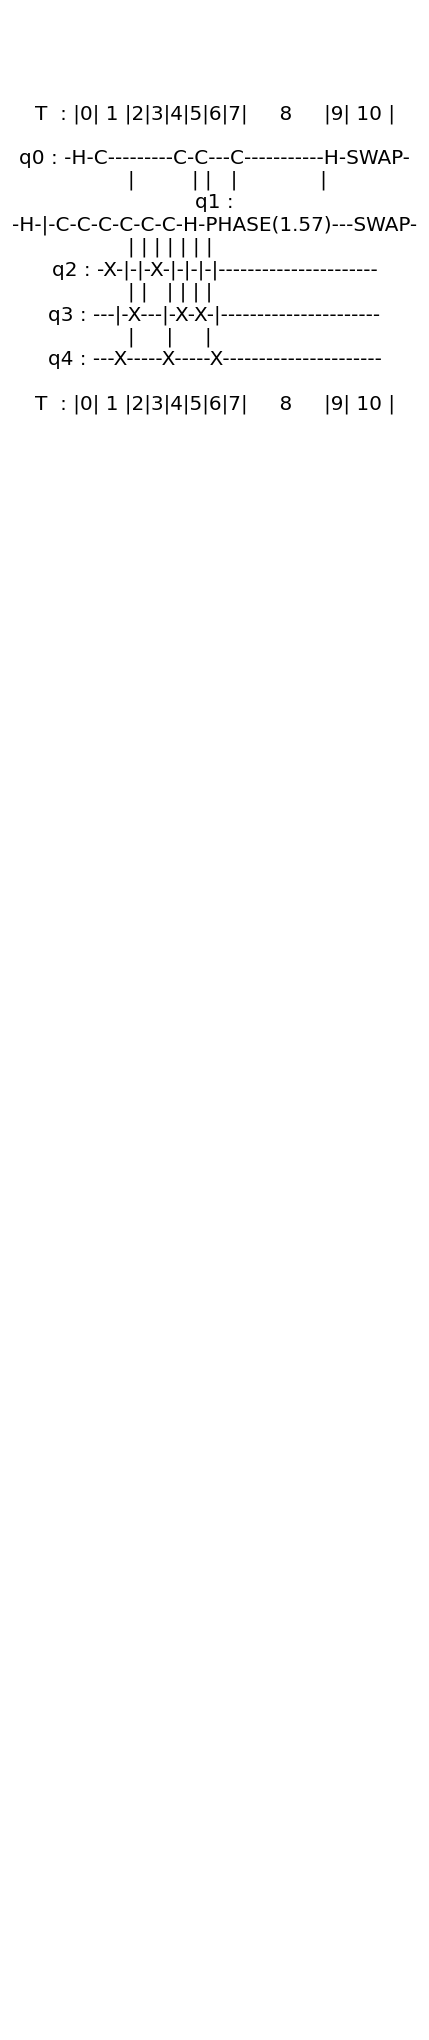

In [49]:
# The following is to save the circuit of each platform in an image

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import io
import sys

# Redirect the standard output to a string buffer
stdout = sys.stdout
sys.stdout = io.StringIO()

selected_framework = 'amazonbraket'  # Change this to the desired framework
translated_circuit = translate_to_framework(circ, selected_framework) #The quantum circuit is translated 
#to the desired framework (in this case, Qiskit) and printed.
translated_circuit.print_circuit()


printed_circuit = sys.stdout.getvalue()

# Restore the standard output
sys.stdout = stdout
# Define the bbox
bbox = {'width': 100, 'height': 100}

# Save the printed circuit as an image with its exact size
plt.figure(figsize=(bbox['width'] / 100, bbox['height'] / 100), dpi=120)  # Convert from points to inches
plt.text(0, 0, printed_circuit, ha='center', va='top', wrap=True, fontsize=12)
plt.axis('off')
plt.savefig("Shor algorithm 21.png", bbox_inches='tight', pad_inches=0, dpi=100)

# Show the image
plt.show()

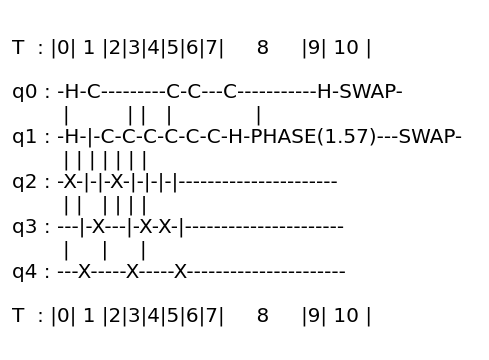

In [64]:

import matplotlib.pyplot as plt
import io
import sys

# Redirect the standard output to a string buffer
stdout = sys.stdout
sys.stdout = io.StringIO()

selected_framework = 'amazonbraket'  # Change this to the desired framework
translated_circuit = translate_to_framework(circ, selected_framework) #The quantum circuit is translated 
#to the desired framework (in this case, Qiskit) and printed.
translated_circuit.print_circuit()

printed_circuit = sys.stdout.getvalue()

# Restore the standard output
sys.stdout = stdout

# Calculate the size of the printed circuit
lines = printed_circuit.split('\n')
num_lines = len(lines)
max_line_length = max(len(line) for line in lines)
avg_char_width = 0.1  # Adjust this value based on your font and layout
max_width = max_line_length * avg_char_width
height_per_line = 0.2  # Adjust this value based on your font and layout
total_height = num_lines * height_per_line

# Define the bbox
bbox = {'width': max_width, 'height': total_height}

# Save the printed circuit as an image with its exact size
plt.figure(figsize=(bbox['width'], bbox['height']), dpi=120)  
plt.text(0, 0, printed_circuit, ha='left', va='top', wrap=True, fontsize=12)
plt.axis('off')
plt.tight_layout(pad=0)  # Remove any padding
plt.savefig("Shor_algorithm.png", bbox_inches='tight', pad_inches=0, dpi=100)

# Show the image
plt.show()